In [1]:
import numpy as np
import pandas as pd
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# 資料描述
---
#### Abstract: This dataset is a heart disease database similar to a database already present in the repository (Heart Disease databases) but in a slightly different form

### 判斷是否有心臟方面的疾病




### 欄位描述
---
-- 1. age 

-- 2. sex 

-- 3. chest pain type (4 values) 

-- 4. resting blood pressure 

-- 5. serum cholestoral in mg/dl 

-- 6. fasting blood sugar > 120 mg/dl 

-- 7. resting electrocardiographic results (values 0,1,2) 

-- 8. maximum heart rate achieved 

-- 9. exercise induced angina 

-- 10. oldpeak = ST depression induced by exercise relative to rest 

-- 11. the slope of the peak exercise ST segment 

-- 12. number of major vessels (0-3) colored by flourosopy 

-- 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 


In [2]:
header = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
          'serum_cholestoral', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 
          'heart_rate', 'exercise_induced_angina', 'oldpeak', 'ST', 'vessels', 'thal', 'Absence']
df = pd.read_csv('heart.dat', sep=' ', names=header)

df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,heart_rate,exercise_induced_angina,oldpeak,ST,vessels,thal,Absence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
age                                     270 non-null float64
sex                                     270 non-null float64
chest_pain_type                         270 non-null float64
resting_blood_pressure                  270 non-null float64
serum_cholestoral                       270 non-null float64
fasting_blood_sugar                     270 non-null float64
resting_electrocardiographic_results    270 non-null float64
heart_rate                              270 non-null float64
exercise_induced_angina                 270 non-null float64
oldpeak                                 270 non-null float64
ST                                      270 non-null float64
vessels                                 270 non-null float64
thal                                    270 non-null float64
Absence                                 270 non-null int64
dtypes: float64(13), int64(1)
memory usage:

In [4]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,heart_rate,exercise_induced_angina,oldpeak,ST,vessels,thal,Absence
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [5]:
y = df.pop('Absence')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
age                                     270 non-null float64
sex                                     270 non-null float64
chest_pain_type                         270 non-null float64
resting_blood_pressure                  270 non-null float64
serum_cholestoral                       270 non-null float64
fasting_blood_sugar                     270 non-null float64
resting_electrocardiographic_results    270 non-null float64
heart_rate                              270 non-null float64
exercise_induced_angina                 270 non-null float64
oldpeak                                 270 non-null float64
ST                                      270 non-null float64
vessels                                 270 non-null float64
thal                                    270 non-null float64
dtypes: float64(13)
memory usage: 27.5 KB


# 資料切分
---
## 總比數270
### 切分80/20 做訓練與測試用
##### 訓練集 189筆、測試集81筆

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=4)
print("Train DataSet:", X_train.shape[0], ", Test DataSet:", X_test.shape[0])

Train DataSet: 189 , Test DataSet: 81


# 隨機森林法
---
### 評估標準 : Entropy
### 樹的最大深度 : 3

In [8]:
RF = RandomForestClassifier(n_estimators=3, criterion='entropy', max_depth=3)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
print("Train accuracy %.2f" % (RF.score(X_train, y_train)))
print("Test accuracy  %.2f" % (RF.score(X_test, y_test)))

Train accuracy 0.88
Test accuracy  0.73


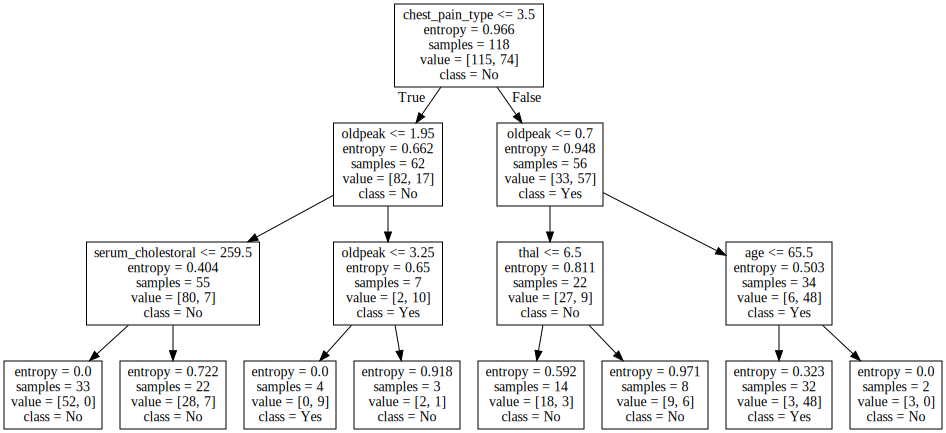

In [10]:
estimator = RF.estimators_[2]
dot_data = export_graphviz(estimator, out_file=None, feature_names=df.columns, class_names=['No', 'Yes']) 
graph = graphviz.Source(dot_data)
graph

In [11]:
from sklearn import metrics

print(metrics.classification_report(y_test, RF.predict(X_test)))
print(metrics.confusion_matrix(y_test, RF.predict(X_test), labels=[0, 1]))

detail_df = pd.DataFrame({'Feature': df.columns, 'Feature_importance':RF.feature_importances_.tolist()})
detail_df = detail_df.sort_values('Feature_importance', ascending=False)
detail_df

             precision    recall  f1-score   support

          1       0.66      0.90      0.76        39
          2       0.86      0.57      0.69        42

avg / total       0.76      0.73      0.72        81

[[ 0  0]
 [ 0 35]]


,Feature,Feature_importance
7,heart_rate,0.247933
12,thal,0.188453
9,oldpeak,0.169757
2,chest_pain_type,0.167056
1,sex,0.063728
3,resting_blood_pressure,0.045707
11,vessels,0.033803
0,age,0.032161
4,serum_cholestoral,0.029602
5,fasting_blood_sugar,0.021801


# 決策樹
---
#### 評估標準 : Entropy
#### 樹的最大深度 : 3

In [12]:
DT = DecisionTreeClassifier(max_depth=3, criterion='entropy')
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
print("Train accuracy %.2f" % (DT.score(X_train, y_train)))
print("Test accuracy  %.2f" % (DT.score(X_test, y_test)))

Train accuracy 0.83
Test accuracy  0.68


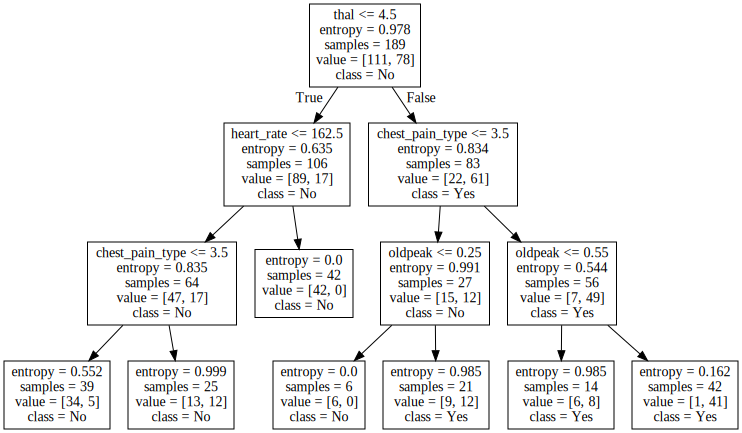

In [14]:
dot_data = export_graphviz(DT, out_file=None, feature_names=df.columns, class_names=['No', 'Yes']) 
graph = graphviz.Source(dot_data)
graph

In [15]:
print(metrics.classification_report(y_test, DT.predict(X_test)))
print(metrics.confusion_matrix(y_test, DT.predict(X_test), labels=[0, 1]))

detail_dt = pd.DataFrame({'Feature': df.columns, 'Feature_importance':DT.feature_importances_.tolist()})
detail_dt = detail_dt.sort_values('Feature_importance', ascending=False)
detail_dt

             precision    recall  f1-score   support

          1       0.63      0.82      0.71        39
          2       0.77      0.55      0.64        42

avg / total       0.70      0.68      0.67        81

[[ 0  0]
 [ 0 32]]


,Feature,Feature_importance
12,thal,0.497345
2,chest_pain_type,0.195624
9,oldpeak,0.163891
7,heart_rate,0.143139
0,age,0.000000
1,sex,0.000000
3,resting_blood_pressure,0.000000
4,serum_cholestoral,0.000000
5,fasting_blood_sugar,0.000000
6,resting_electrocardiographic_results,0.000000
